# Poisson problem

Let us solve the Poisson problem of finding $u$ satisfying 

$$
\begin{aligned}
-\Delta u + u& = f && \text { in  } (0,10)^2,
\\
\frac{\partial u }{\partial n } & = 0 
&& \text{ on the boundary parts}.
\end{aligned}
$$

## Quick steps to solution:

#### 1. Import NGSolve and Netgen Python modules:

In [1]:
from ngsolve import *
from ngsolve.webgui import Draw

#### 2. Main discretization parameters and mesh

In [2]:
order = 2
maxh = [1/n for n in range(1,10)]

from netgen.geom2d import SplineGeometry
geo = SplineGeometry()
geo.AddRectangle((0,0), (10,10), bcs=['bottom','right','top','left'])

mesh_list = [Mesh(geo.GenerateMesh(maxh=h)) for h in maxh]
for i in range(len(maxh)):
    mesh_list[i].nv, mesh_list[i].ne  #number of vertices, number of elements

#### 3. Reference solution and corresponding right hand side


In [3]:
ref_sol = exp(-2*((x-4)**2+(y-6)**2))

for i in range(len(maxh)):
    Draw(ref_sol, mesh_list[i], "reference solution")

refdx = ref_sol.Diff(x)
refdy = ref_sol.Diff(y)
rhs = -refdx.Diff(x)-refdy.Diff(y) + ref_sol

ref_sol_grad = CoefficientFunction( (refdx,refdy) )

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

#### 4. Declare a finite element space and gridfunction

In [4]:
fes_list = [H1(mesh, order=order) for mesh in mesh_list]# fe space
sol = [GridFunction(fes) for fes in fes_list]  # solution
#print(fes.ndof) # number of degrees of freedom

#### 5. Define and assemble linear and bilinear forms

In [5]:
u_list = [fes_list[i].TrialFunction() for i in range(len(fes_list))]  # symbolic object
v_list = [fes_list[i].TestFunction() for i in range(len(fes_list))]  # symbolic object

a_list = [BilinearForm(fes_list[i], symmetric=True) for i in range(len(fes_list))]

for i in range(len(a_list)):
    a_list[i] += (grad(u_list[i])*grad(v_list[i]) + u_list[i]*v_list[i])*dx
    a_list[i].Assemble()

f_list = [LinearForm(fes_list[i]) for i in range(len(fes_list))]

for i in range(len(f_list)):
    f_list[i] += rhs*v_list[i]*dx
    f_list[i].Assemble()

#### 6. Solve system and draw solution

In [6]:
from time import time
t1 = time()
for i in range(len(mesh_list)):
    sol[i].vec.data = a_list[i].mat.Inverse(freedofs=fes_list[i].FreeDofs()) * f_list[i].vec
print("time = ", time()-t1)

for i in range(len(mesh_list)):
    Draw(sol[i], mesh_list[i], "sol")

time =  0.4567897319793701


NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

#### 7. Compute error

In [7]:
for i in range(len(maxh)):
    Draw(sqrt((ref_sol-sol[i])**2 + InnerProduct(ref_sol_grad-Grad(sol[i]),ref_sol_grad-Grad(sol[i]))), mesh_list[i], 'error')
H1err = [sqrt( Integrate((ref_sol-sol[i])**2 + InnerProduct(ref_sol_grad-Grad(sol[i]),ref_sol_grad-Grad(sol[i])), mesh_list[i], VOL, 2*order) ) for i in range(len(maxh))]
#help(Integrate)
print(H1err)


NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

[0.45682032753337776, 0.14833301472741847, 0.0630012738579597, 0.030918058907279854, 0.019109975635172242, 0.013677326513667595, 0.009713985618086608, 0.00782516978614647, 0.005887876022466763]


#### 8. Draw error plot

<IPython.core.display.Javascript object>


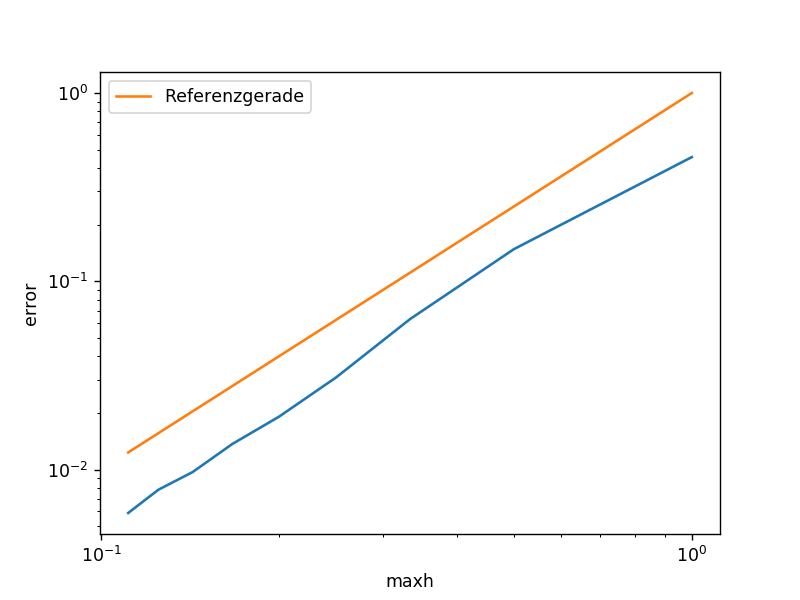

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

ndof_list = [fes_list[i].ndof for i in range(len(fes_list))]
reference = [h**order for h in maxh]

plt.plot(maxh, H1err)
plt.plot(maxh, reference, label = "Referenzgerade" , )

plt.yscale('log')
plt.xscale('log')
plt.xlabel("maxh")
plt.ylabel("error")
plt.legend()
plt.show()